In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y
data = project1_Alona_Gauri_Valeria.data.iloc[:1000]

# Project 2
# REGRESSION PART A (1)

In [39]:
#making sure data is standardized
print("Means of X columns", np.mean(X, axis=0))
print("SDs of X columns", np.std(X, axis=0))

Means of X columns [ 2.44487823e-16  1.45428102e-16 -1.33836007e-16 -8.11446654e-17
 -3.99690168e-15  9.69520678e-17  2.78210281e-16 -8.43061459e-17
 -2.00227096e-16]
SDs of X columns [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:
#defining methods to calculate test and train error 

def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum ([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [41]:
#REGRESSION PART A (1) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = train_error(model, X_train, y_train)
test_rmse = test_error(model, X_test, y_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

#printing weights
#print(model.coef_)


Train RMSE: 1475190.868741403
Test RMSE: 1499636.6903304493
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073519


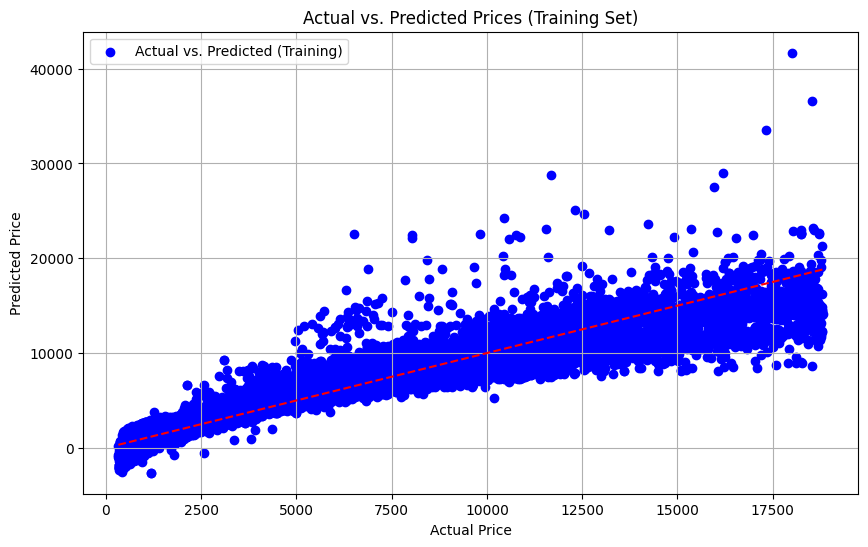

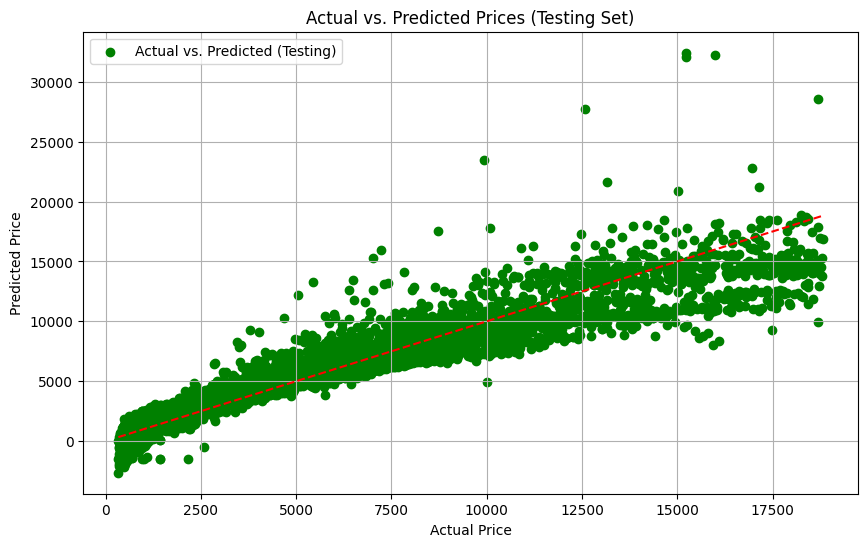

In [42]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

## REGRESSION PART A (2)

In [57]:
#introducing a regularization parameter lambda, estimating generalization error and calculating test error

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

lambda_values = [0, 10, 20, 30, 40, 50, 60,70,80,90,100]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

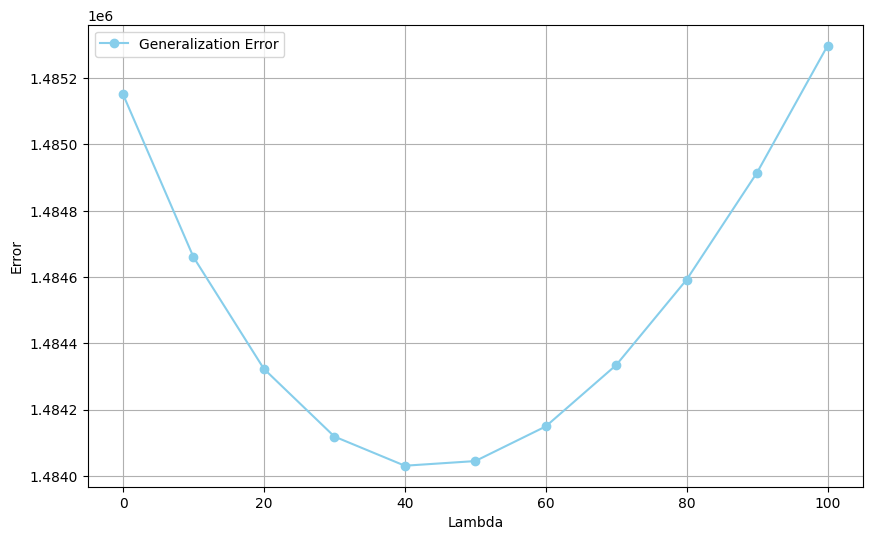

In [60]:
#plotting generalization error (and test error) as a function of lambda
#8.1.1

lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
#plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# REGRESSION PART A (3)

# REGRESSION PART B (1)

First, we need to build an artificial neural network

In [64]:
from sklearn.neural_network import MLPRegressor

def neural_network(h, X_train, y_train, X_test, y_test):
    ann_model = MLPRegressor(
            hidden_layer_sizes=(h,),
            max_iter=1000,  # Increase the number of iterations
            learning_rate_init=0.001,  # Adjust the learning rate
            solver='adam',  # Try different solvers
            early_stopping=True,  # Enable early stopping
            random_state=42
        )
    ann_model.fit(X_train, y_train)
    y_est = ann_model.predict(X_test)
    est_error = sum((y_est-y_test)**2)/len(y_est)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_est, color='green', label='Actual vs. Predicted (Testing)')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs. Predicted Prices (Testing Set)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return est_error

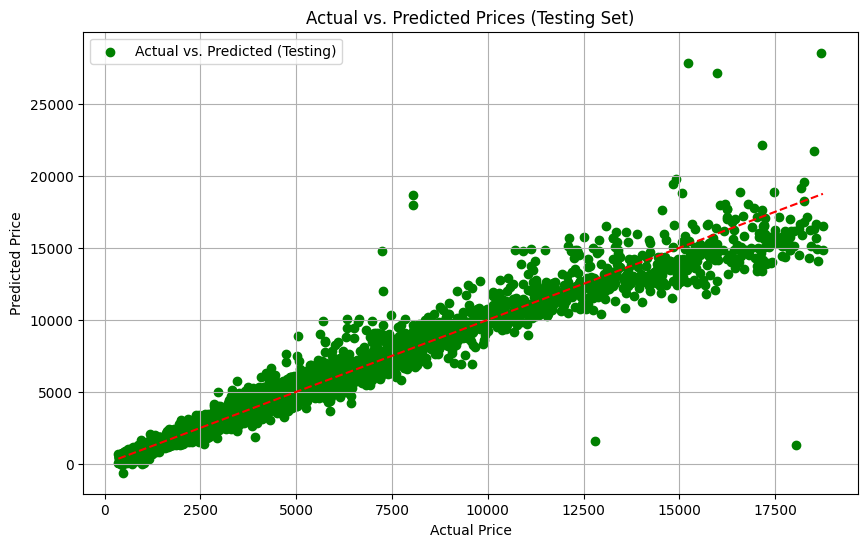

656791.2968829917


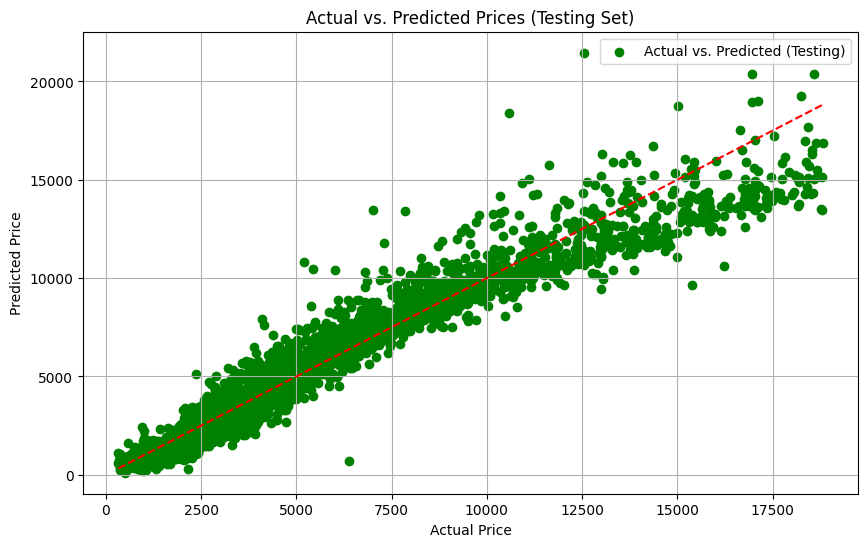

741688.9474181206


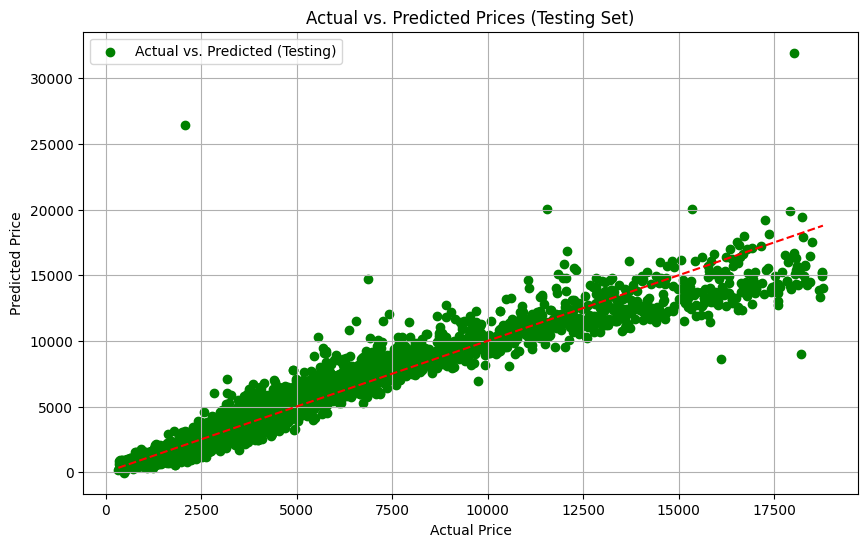

894493.0656343191


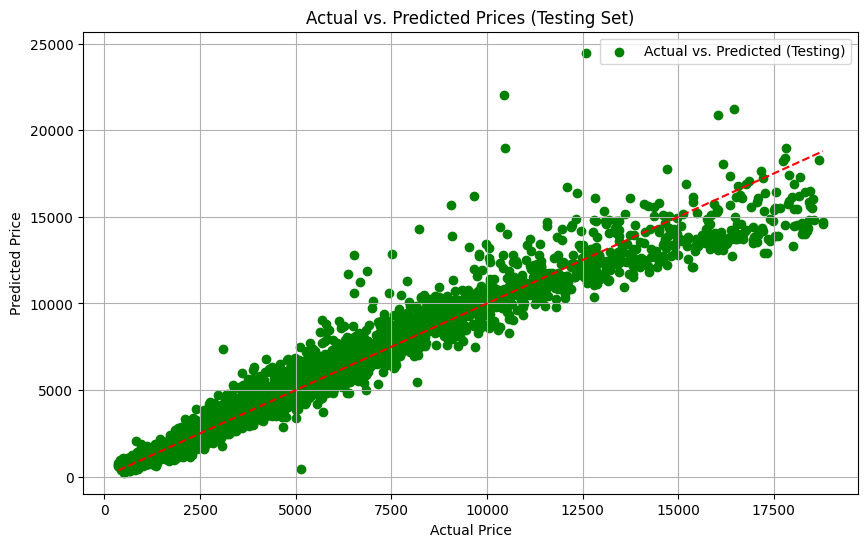

627061.8852421236


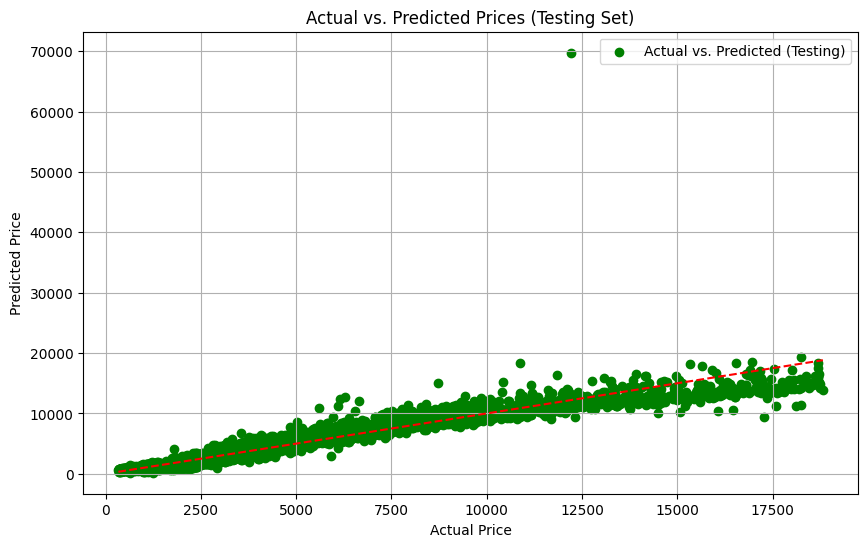

1404653.5897123585


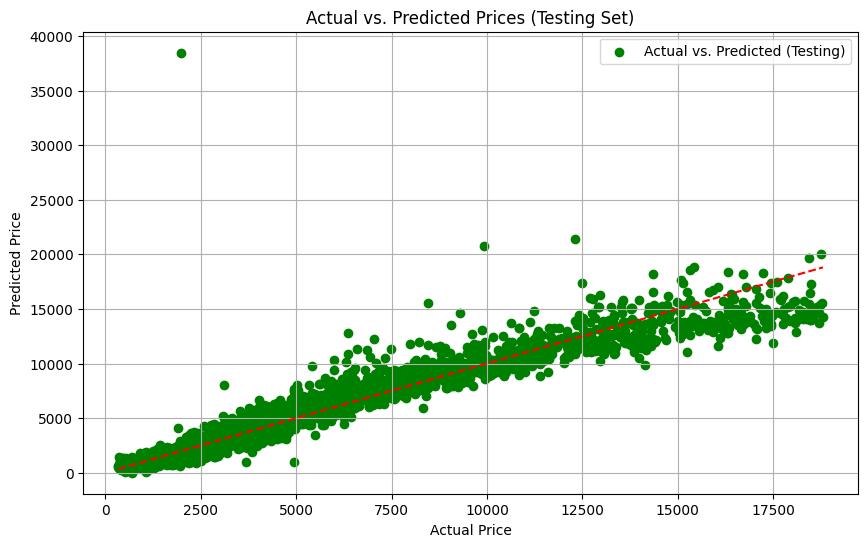

1045963.5135316321


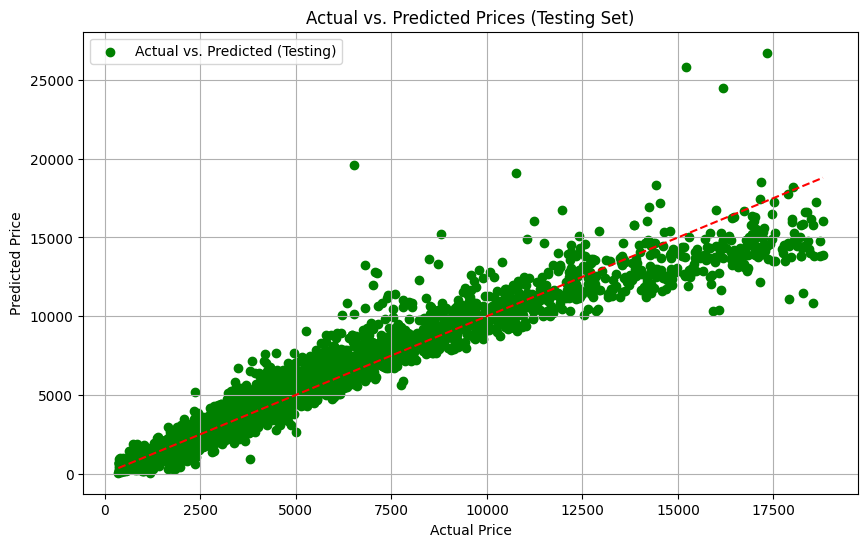

842936.3167593362


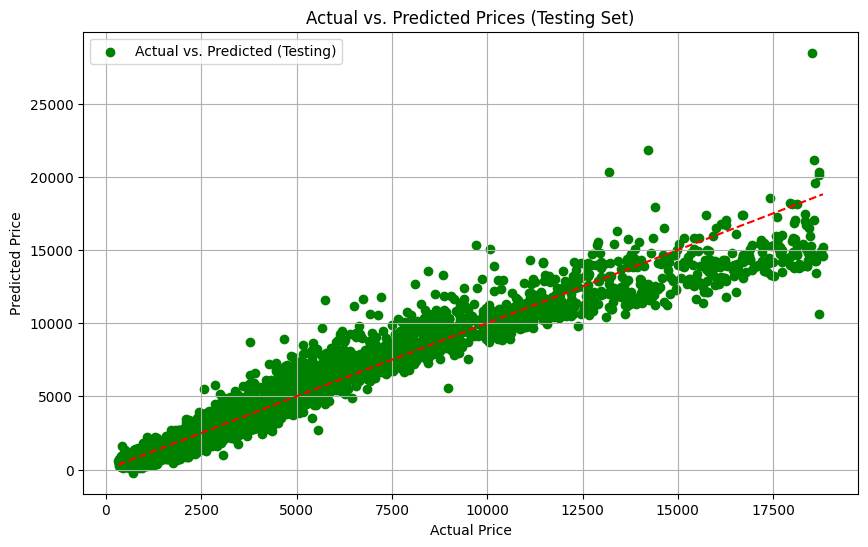

835971.3374325903


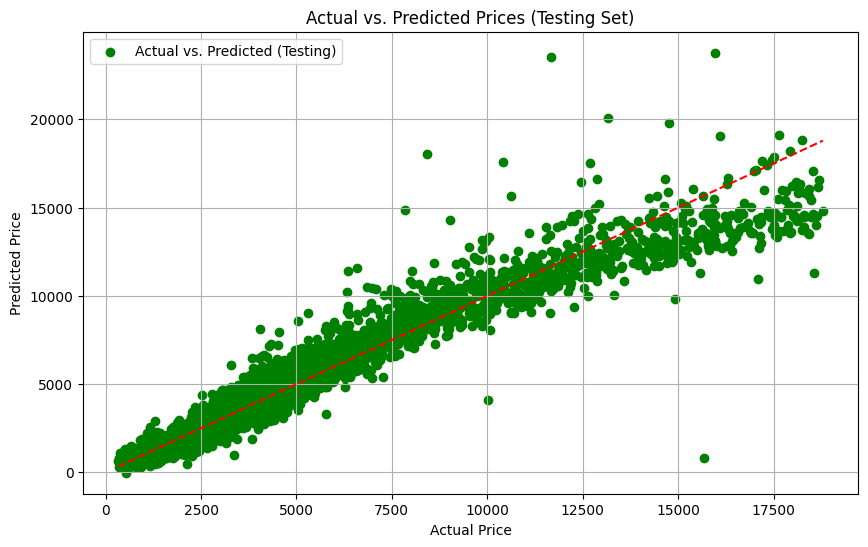

848160.612787391


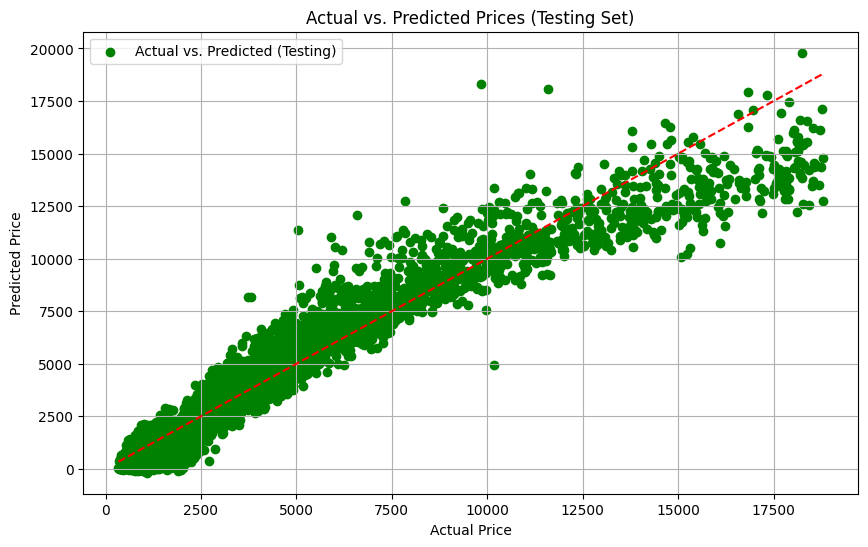

1075043.0002947086


In [65]:

from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

kf = KFold(n_splits=10,shuffle=True)

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
       # Adjusted ANN model with specified parameters
    
    print(neural_network(15, X_train, y_train, X_test, y_test))



In [ ]:
# When dealing with regression outputs, a simple way of looking at the quality
# of predictions visually is by plotting the estimated value as a function of
# the true/known value - these values should all be along a straight line "y=x",
# and if the points are above the line, the model overestimates, whereas if the
# points are below the y=x line, then the model underestimates the value
plt.figure(figsize=(10, 10))
y_est = y_test_est.data.numpy()
y_true = y_test.data.numpy()
axis_range = [np.min([y_est, y_true]) - 1, np.max([y_est, y_true]) + 1]
plt.plot(axis_range, axis_range, "k--")
plt.plot(y_true, y_est, "ob", alpha=1)
plt.legend(["Perfect estimation", "Model estimations"])
plt.title(" Estimated versus true value (for last CV-fold)")
plt.ylim(axis_range)
plt.xlim(axis_range)
plt.xlabel("True value")
plt.ylabel("Estimated value")
plt.grid()

plt.show()

In [ ]:
#REGRESSION PART B (1)

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the number of folds for both levels of cross-validation
K1 = K2 = 10

# Define the range of complexity-controlling parameters
h_values = [1, 5, 10, 20]  # Example range for the number of hidden units in the ANN
lambda_values = [0.001, 0.01, 0.1, 1, 10]  # Example range for λ in regularized linear regression

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# Initialize lists to store the performance of each model
baseline_scores = []
ridge_scores = []
ann_scores = []

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
    
    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)
    
    # Initialize dictionaries to store the sum of scores for each hyperparameter setting
    ridge_scores_sum = {lmbda: 0 for lmbda in lambda_values}
    ann_scores_sum = {h: 0 for h in h_values}
    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_val_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_val = X_outer_train[inner_train_index], X_outer_train[inner_val_index]
        y_inner_train, y_inner_val = y_outer_train[inner_train_index], y_outer_train[inner_val_index]
        
        # Standardize features
        scaler = StandardScaler()
        X_inner_train_scaled = scaler.fit_transform(X_inner_train)
        X_inner_val_scaled = scaler.transform(X_inner_val)
        
        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train_scaled, y_inner_train)
            y_ridge_pred = ridge_model.predict(X_inner_val_scaled)
            ridge_scores_sum[lmbda] += mean_squared_error(y_inner_val, y_ridge_pred)
        
        # Train ANN models with different numbers of hidden units on the inner training set
        for h in h_values:
            # Adjusted ANN model with specified parameters
            ann_model = MLPRegressor(
                hidden_layer_sizes=(h,),
                max_iter=1000,  # Increase the number of iterations
                learning_rate_init=0.001,  # Adjust the learning rate
                solver='adam',  # Try different solvers
                early_stopping=True,  # Enable early stopping
                random_state=42
            )
            ann_model.fit(X_inner_train_scaled, y_inner_train)
            y_ann_pred = ann_model.predict(X_inner_val_scaled)
            ann_scores_sum[h] += mean_squared_error(y_inner_val, y_ann_pred)
    
    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(ridge_scores_sum, key=ridge_scores_sum.get)
    best_h = min(ann_scores_sum, key=ann_scores_sum.get)
    
    # Train the models with the best hyperparameters on the outer training set and evaluate on the outer test set
    # Standardize features
    scaler = StandardScaler()
    X_outer_train_scaled = scaler.fit_transform(X_outer_train)
    X_outer_test_scaled = scaler.transform(X_outer_test)
    
    # Baseline
    baseline_model = DummyRegressor(strategy='mean')
    baseline_model.fit(X_outer_train, y_outer_train)
    y_baseline_pred = baseline_model.predict(X_outer_test)
    baseline_scores.append(mean_squared_error(y_outer_test, y_baseline_pred))
    
    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train_scaled, y_outer_train)
    y_ridge_pred = ridge_model.predict(X_outer_test_scaled)
    ridge_scores.append(mean_squared_error(y_outer_test, y_ridge_pred))
    
    # ANN with the best number of hidden units
    ann_model = MLPRegressor(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42
    )
    ann_model.fit(X_outer_train_scaled, y_outer_train)
    y_ann_pred = ann_model.predict(X_outer_test_scaled)
    ann_scores.append(mean_squared_error(y_outer_test, y_ann_pred))

# Calculate the average performance across all outer folds
avg_baseline_score = np.mean(baseline_scores)
avg_ridge_score = np.mean(ridge_scores)
avg_ann_score = np.mean(ann_scores)

# Compare the models
print("Baseline Model Average MSE:", avg_baseline_score)
print("Regularized Linear Regression Average MSE:", avg_ridge_score)
print("Artificial Neural Network Average MSE:", avg_ann_score)


# REGRESSION PART B (2)

In [ ]:
#REGRESSION PART B (2)

# Define the number of folds for both levels of cross-validation
K1 = K2 = 10

# Define the range of complexity-controlling parameters
h_values = [3, 4]  # Example range for the number of hidden units in the ANN
lambda_values = [0.01, 0.05]  # Example range for λ in regularized linear regression

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K1, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K2, shuffle=True, random_state=42)

# Initialize lists to store the results for each outer fold
results = []

# Outer cross-validation loop
for i, (train_index, test_index) in enumerate(outer_cv.split(X)):
    # Split the data into training and test sets for the outer loop
    X_outer_train, X_outer_test = X[train_index], X[test_index]
    y_outer_train, y_outer_test = y[train_index], y[test_index]
    
    # If y is a pandas Series, reset the index
    if isinstance(y_outer_train, pd.Series):
        y_outer_train = y_outer_train.reset_index(drop=True)
    if isinstance(y_outer_test, pd.Series):
        y_outer_test = y_outer_test.reset_index(drop=True)
    
    # Initialize dictionaries to store the sum of scores for each hyperparameter setting
    ridge_scores_sum = {lmbda: 0 for lmbda in lambda_values}
    ann_scores_sum = {h: 0 for h in h_values}
    
    # Inner cross-validation loop (model selection and hyperparameter tuning)
    for inner_train_index, inner_val_index in inner_cv.split(X_outer_train):
        # Split the data into training and validation sets for the inner loop
        X_inner_train, X_inner_val = X_outer_train[inner_train_index], X_outer_train[inner_val_index]
        y_inner_train, y_inner_val = y_outer_train[inner_train_index], y_outer_train[inner_val_index]
        
        # Standardize features
        scaler = StandardScaler()
        X_inner_train_scaled = scaler.fit_transform(X_inner_train)
        X_inner_val_scaled = scaler.transform(X_inner_val)
        
        # Train regularized linear regression models with different λ values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_inner_train_scaled, y_inner_train)
            y_ridge_pred = ridge_model.predict(X_inner_val_scaled)
            ridge_scores_sum[lmbda] += mean_squared_error(y_inner_val, y_ridge_pred)
            
            # Train ANN models with different numbers of hidden units on the inner training set
for h in h_values:
    ann_model = MLPRegressor(
        hidden_layer_sizes=(h,),
        max_iter=2000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42,
        verbose=True  # Enable verbose mode to monitor convergence
    )
    ann_model.fit(X_inner_train_scaled, y_inner_train)  # Training the model

    # Check if the optimization converged
    if not ann_model.n_iter_ == 2000:
        print("Warning: The optimization may not have converged.")

    y_ann_pred = ann_model.predict(X_inner_val_scaled)
    ann_scores_sum[h] += mean_squared_error(y_inner_val, y_ann_pred)
    
    # Select the best hyperparameters based on the inner fold scores
    best_lambda = min(ridge_scores_sum, key=ridge_scores_sum.get)
    best_h = min(ann_scores_sum, key=ann_scores_sum.get)
    
    # Train the models with the best hyperparameters on the outer training set and evaluate on the outer test set
    # Standardize features
    scaler = StandardScaler()
    X_outer_train_scaled = scaler.fit_transform(X_outer_train)
    X_outer_test_scaled = scaler.transform(X_outer_test)
    
    # Baseline
    baseline_model = DummyRegressor(strategy='mean')
    baseline_model.fit(X_outer_train, y_outer_train)
    y_baseline_pred = baseline_model.predict(X_outer_test)
    baseline_test_error = mean_squared_error(y_outer_test, y_baseline_pred)
    
    # Regularized linear regression with the best λ value
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_outer_train_scaled, y_outer_train)
    y_ridge_pred = ridge_model.predict(X_outer_test_scaled)
    ridge_test_error = mean_squared_error(y_outer_test, y_ridge_pred)
    
    # ANN with the best number of hidden units
    ann_model = MLPRegressor(
        hidden_layer_sizes=(best_h,),
        max_iter=1000,  # Increase the number of iterations
        learning_rate_init=0.001,  # Adjust the learning rate
        solver='adam',  # Try different solvers
        early_stopping=True,  # Enable early stopping
        random_state=42
    )
    ann_model.fit(X_outer_train_scaled, y_outer_train)
    y_ann_pred = ann_model.predict(X_outer_test_scaled)
    ann_test_error = mean_squared_error(y_outer_test, y_ann_pred)
    
    # Store the results for this fold
    results.append({
        'Fold': i + 1,
        'Optimal h': best_h,
        'ANN Test Error': ann_test_error,
        'Optimal λ': best_lambda,
        'Ridge Test Error': ridge_test_error,
        'Baseline Test Error': baseline_test_error
    })

# Convert the results to a pandas DataFrame for easy table creation
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

Iteration 256, loss = 1295339.30723423
Validation score: 0.837503
Iteration 257, loss = 1287780.05771727
Validation score: 0.838431
Iteration 258, loss = 1280262.52169257
Validation score: 0.839352
Iteration 259, loss = 1272789.39953978
Validation score: 0.840270
Iteration 260, loss = 1265345.84753616
Validation score: 0.841181
Iteration 261, loss = 1257965.77320045
Validation score: 0.842094
Iteration 262, loss = 1250603.60079869
Validation score: 0.843001
Iteration 263, loss = 1243284.27420673
Validation score: 0.843907
Iteration 264, loss = 1236010.51850153
Validation score: 0.844805
Iteration 265, loss = 1228789.75681264
Validation score: 0.845702
Iteration 266, loss = 1221591.35585259
Validation score: 0.846595
Iteration 267, loss = 1214393.48876326
Validation score: 0.847484
Iteration 268, loss = 1207212.04313210
Validation score: 0.848365
Iteration 269, loss = 1200087.67160122
Validation score: 0.849239
Iteration 270, loss = 1193013.99150393
Validation score: 0.850120
Iteration 

Iteration 392, loss = 734029.17402873
Validation score: 0.903966
Iteration 393, loss = 733218.16668242
Validation score: 0.904054
Iteration 394, loss = 732455.85329148
Validation score: 0.904128
Iteration 395, loss = 731697.80167164
Validation score: 0.904201
Iteration 396, loss = 730956.63147439
Validation score: 0.904270
Iteration 397, loss = 730256.15511094
Validation score: 0.904338
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 15494283.79087150
Validation score: -0.958267
Iteration 2, loss = 15480983.47813996
Validation score: -0.956225
Iteration 3, loss = 15461009.52248012
Validation score: -0.953286
Iteration 4, loss = 15433721.74774376
Validation score: -0.949447
Iteration 5, loss = 15399279.95343675
Validation score: -0.944735
Iteration 6, loss = 15358070.83910948
Validation score: -0.939204
Iteration 7, loss = 15310626.60719078
Validation score: -0.932942
Iteration 8, loss = 15257351.91386604
Validation score:

Iteration 125, loss = 2217823.90571882
Validation score: 0.717316
Iteration 126, loss = 2184176.68644662
Validation score: 0.721861
Iteration 127, loss = 2152117.54789016
Validation score: 0.726257
Iteration 128, loss = 2121477.47289622
Validation score: 0.730469
Iteration 129, loss = 2092056.22768175
Validation score: 0.734507
Iteration 130, loss = 2063923.05508558
Validation score: 0.738393
Iteration 131, loss = 2036921.37582773
Validation score: 0.742100
Iteration 132, loss = 2010985.46148287
Validation score: 0.745680
Iteration 133, loss = 1986064.64133309
Validation score: 0.749143
Iteration 134, loss = 1962061.43601573
Validation score: 0.752461
Iteration 135, loss = 1938841.46974147
Validation score: 0.755715
Iteration 136, loss = 1916308.57169102
Validation score: 0.758838
Iteration 137, loss = 1894567.46254756
Validation score: 0.761871
Iteration 138, loss = 1873428.40812638
Validation score: 0.764812
Iteration 139, loss = 1852762.90765605
Validation score: 0.767686
Iteration 

Iteration 254, loss = 759707.61711925
Validation score: 0.918395
Iteration 255, loss = 757380.55352569
Validation score: 0.918694
Iteration 256, loss = 755103.81542597
Validation score: 0.918969
Iteration 257, loss = 752870.44921622
Validation score: 0.919245
Iteration 258, loss = 750741.27978543
Validation score: 0.919519
Iteration 259, loss = 748651.77466088
Validation score: 0.919779
Iteration 260, loss = 746606.90561608
Validation score: 0.920042
Iteration 261, loss = 744628.17928678
Validation score: 0.920279
Iteration 262, loss = 742682.61175161
Validation score: 0.920517
Iteration 263, loss = 740795.67398825
Validation score: 0.920746
Iteration 264, loss = 738932.02216366
Validation score: 0.920975
Iteration 265, loss = 737082.90020469
Validation score: 0.921192
Iteration 266, loss = 735313.29379328
Validation score: 0.921415
Iteration 267, loss = 733540.23908704
Validation score: 0.921614
Iteration 268, loss = 731835.71983785
Validation score: 0.921811
Iteration 269, loss = 730

In [ ]:
import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy import stats
from scipy.io import loadmat
from sklearn import model_selection

from dtuimldmtools import draw_neural_net, train_neural_net

# Parameters for neural network classifier
n_hidden_units = 1  # number of hidden units
n_replicates = 1  # number of networks trained in each k-fold
max_iter = 10000

# K-fold crossvalidation
K = 3  # only three folds to speed up this example
CV = model_selection.KFold(K, shuffle=True)

# Setup figure for display of learning curves and error rates in fold
summaries, summaries_axes = plt.subplots(1, 2, figsize=(10, 5))
# Make a list for storing assigned color of learning curve for up to K=10
color_list = [
    "tab:orange",
    "tab:green",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:red",
    "tab:blue",
]
# Define the model
model = lambda: torch.nn.Sequential(
    torch.nn.Linear(9, n_hidden_units),  # M features to n_hidden_units
    torch.nn.Tanh(),  # 1st transfer function,
    torch.nn.Linear(n_hidden_units, 1),  # n_hidden_units to 1 output neuron
    # no final tranfer function, i.e. "linear output"
)
loss_fn = torch.nn.MSELoss()  # notice how this is now a mean-squared-error loss

print("Training model of type:\n\n{}\n".format(str(model())))
errors = []  # make a list for storing generalizaition error in each loop

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    # Train the net on training data
    
    net, final_loss, learning_curve = train_neural_net(
        model,
        loss_fn,
        X=X_train,
        y=y_train,
        n_replicates=n_replicates,
        max_iter=max_iter,
    )

    print("\n\tBest loss: {}\n".format(final_loss))

    # Determine estimated class labels for test set
    y_test_est = net(X_test)


    # Determine errors and append the mean squared error to the errors list
    se = (y_test_est.float() - y_test.float()) ** 2  # squared error
    mse = torch.mean(se).item()  # calculate mean squared error
    errors.append(mse)  # store mean squared error for current CV fold

    # Display the learning curve for the best net in the current fold
    (h,) = summaries_axes[0].plot(learning_curve, color=color_list[k])
    h.set_label("CV fold {0}".format(k + 1))
    summaries_axes[0].set_xlabel("Iterations")
    summaries_axes[0].set_xlim((0, max_iter))
    summaries_axes[0].set_ylabel("Loss")
    summaries_axes[0].set_title("Learning curves")

    plt.figure(figsize=(10, 10))
    y_est = y_test_est.data.numpy()
    y_true = y_test.data.numpy()
    axis_range = [np.min([y_est, y_true]) - 1, np.max([y_est, y_true]) + 1]
    plt.plot(axis_range, axis_range, "k--")
    plt.plot(y_true, y_est, "ob", alpha=1)
    plt.legend(["Perfect estimation", "Model estimations"])
    plt.title(" Estimated versus true value (for last CV-fold)")
    plt.ylim(axis_range)
    plt.xlim(axis_range)
    plt.xlabel("True value")
    plt.ylabel("Estimated value")
    plt.grid()
    plt.show()

# Display the MSE across folds
summaries_axes[1].bar(
    np.arange(1, K + 1), np.squeeze(np.asarray(errors)), color=color_list
)

summaries_axes[1].set_xlabel("Fold")
summaries_axes[1].set_xticks(np.arange(1, K + 1))
summaries_axes[1].set_ylabel("MSE")
summaries_axes[1].set_title("Test mean-squared-error")

print("Diagram of best neural net in last fold:")
weights = [net[i].weight.data.numpy().T for i in [0, 2]]
biases = [net[i].bias.data.numpy() for i in [0, 2]]
tf = [str(net[i]) for i in [1, 2]]
draw_neural_net(weights, biases, tf, attribute_names=attributeNames)

# Print the average classification error rate
print(
    "\nEstimated generalization error, RMSE: {0}".format(
        round(np.sqrt(np.mean(errors)), 4)
    )
)
